# Identificando tendencias de hashtags en twitter
El objetivo de esta libreta es identificar el top 5 de hashtags identificados en los tweets recolectados usando Scala

In [1]:
#Carga de librerías
from pandas import read_csv
import pandas as pd
import numpy as np
import re
from functools import reduce
from collections import Counter
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import collections
from itertools import islice
import unicodedata
import warnings
warnings.filterwarnings('ignore')

In [2]:
def read_data(raw_tweet):
    """Función para leer los tweets recolectados"""
    data = read_csv(raw_tweet, header=0,na_filter=True)
    return data

def hashtags(tweet):
    """Función para identificar los hashtags"""
    hash = []
    for sen in range (0,len(tweet)):
        texto = re.sub(r'\s+', ' ', str(tweet[sen]), flags=re.I)# Substituting multiple spaces with single space
        texto = texto.replace("ー", "") #eliminamos guión medio
        texto = re.sub(r'[0-9]','', texto) #elimina números del 0 al 9
        texto = texto.lower()# Convertimos a minúsculas
        texto = ''.join((c for c in unicodedata.normalize('NFD',texto) if unicodedata.category(c) != 'Mn')) #Eliminamos acentos
        re.findall(r"#(\w+)", texto) #Antes de identificar hashtags, reemplazamos esto:"http://example.org/#comments"
        texto = re.findall(r"#(\w+)", texto)
        hash.append(texto) #podríamos tener filas en blanco en la lista
    hash = list(filter(None,hash))
    return hash

In [3]:
raw_tweets = '../data/export.csv' #Ubicación de los tweets descargados de Databricks!
raw_tweet = read_data(raw_tweets) #leyendo tweets
print(raw_tweet)

                                                  text
0    Several companies with MIT ties are working to...
1    RT @UNAM_MX: El celular es uno de los disposit...
2    RT @IDDocHymes: @ESchwenkMD @iMacHead @DrKarb ...
3    RT @GeorgianLibrary: Students:  tell your stor...
4              RT @GoJackFlynn: How fucked up is this?
..                                                 ...
995  We the People demand to know if the media won’...
996  RT @SWIMIndivisible: This is Maureen. She is o...
997  RT @CJFerguson1111: You TOO can have signed co...
998                                                NaN
999  RT @hadasaco: Me opongo  a ser el sacrificio, ...

[1000 rows x 1 columns]


In [4]:
hash_tweets = hashtags(raw_tweet['text']) #identificando hashtags en tweets
hash_tweets = reduce(lambda x,y: x+y,hash_tweets) #debido a que 'hash_tweets' es una lista de lista, generamos una lista plana
print(hash_tweets[:10])

['georgiancollege', 'georgia', 'covid', 'quedateencasa', 'covid', 'covid', 'conferencia', 'covid', 'cuarentenaobligatoria', 'coronavirusargentina']


In [5]:
dict_hashtags = collections.Counter(hash_tweets) #creamos un diccionario
print(dict_hashtags)

Counter({'covid': 130, 'coronavirus': 16, 'quedateencasa': 10, 'reportecovid': 4, 'miwhitmerswomen': 4, 'stayathome': 4, 'abril': 4, 'n': 4, 'stayhome': 4, 'mexico': 3, 'cuba': 3, 'face': 3, 'mask': 3, 'facemasks': 3, 'envivo': 3, 'staysafe': 3, 'covidao': 3, 'fechadoscombolsonaro': 3, 'eeuu': 3, 'elsalvador': 3, 'georgia': 2, 'wuhan': 2, 'bangbangcon': 2, 'maga': 2, 'abr': 2, 'corona': 2, 'italiano': 2, 'autopsias': 2, 'cancun': 2, 'snteatulado': 2, 'putrajaya': 2, 'venezuela': 2, 'urgente': 2, 'deportes': 2, 'bukeledictador': 2, 'prevencionyaccion': 2, 'ultimominuto': 2, 'nuevanormalidad': 2, 'covi': 2, 'pennsyltucky': 2, 'thankyou': 2, 'petroleo': 2, 'atencion': 2, 'pennsylvania': 2, 'georgiancollege': 1, 'conferencia': 1, 'cuarentenaobligatoria': 1, 'coronavirusargentina': 1, 'happeningnow': 1, 'ntvpres': 1, 'dedicationatworksafetyathome': 1, 'together_a': 1, 'cordobaver': 1, 'coronavirusbrasil': 1, 'americanoticias': 1, 'honduras': 1, '日経メティカル': 1, 'trumpvirus': 1, 'trumpgenocide'

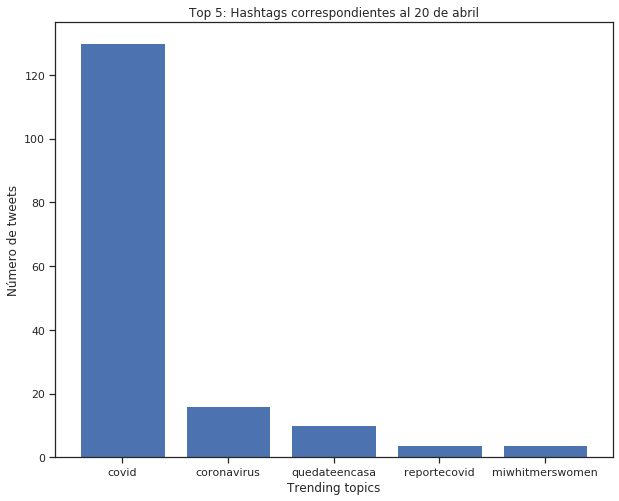

In [6]:
top5 = dict(islice(Counter(hash_tweets).most_common(5), 5))#Visualizamos los 3 hashtags más comunes
plt.figure(figsize=(10, 8))
plt.bar(top5.keys(), top5.values())
plt.title("Top 5: Hashtags correspondientes al 20 de abril")
plt.xlabel("Trending topics")
plt.ylabel("Número de tweets")
plt.show()